In [ ]:
# First cell - Install dependencies
%pip install diffusers transformers torch numpy sentencepiece matplotlib accelerate bitsandbytes

Loading pipeline components...: 100%|██████████| 9/9 [00:01<00:00,  6.37it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (334 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['frame, out of focus, dehydrated, disfigured, extra arms, extra limbs, extra hands, fused fingers, gross proportions, long neck, jpeg, malformed limbs, mutated, mutated hands, mutated limbs, missing arms, missing fingers, picture frame, poorly drawn hands, poorly drawn face, collage, pixel, pixelated, grainy, color aberration, amputee, autograph, bad illustration, beyond the borders, blank background, body out of frame, boring background, branding, cut off, dismembered, disproportioned, distorted, draft, duplicated features, extra fingers, extra legs, fault, flaw, grains, hazy, identifying mark, improper scale, incorrect physiolo

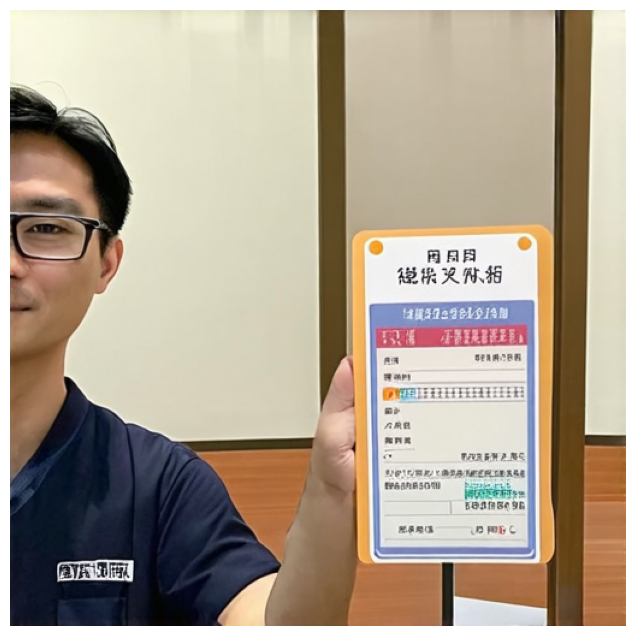

In [ ]:

# Second cell - Import and setup
import torch
from diffusers import StableDiffusion3Pipeline
import matplotlib.pyplot as plt

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(
    prompt="a taiwan man who is a software engineer and have a big Card with the context 'Cheng Yi Fang' on it",
    negative_prompt="worst quality, normal quality, low quality, low res, blurry, distortion, text, watermark, logo, banner, extra digits, cropped, jpeg artifacts, signature, username, error, sketch, duplicate, ugly, monochrome, horror, geometry, mutation, disgusting, bad anatomy, bad proportions, bad quality, deformed, disconnected limbs, out of frame, out of focus, dehydrated, disfigured, extra arms, extra limbs, extra hands, fused fingers, gross proportions, long neck, jpeg, malformed limbs, mutated, mutated hands, mutated limbs, missing arms, missing fingers, picture frame, poorly drawn hands, poorly drawn face, collage, pixel, pixelated, grainy, color aberration, amputee, autograph, bad illustration, beyond the borders, blank background, body out of frame, boring background, branding, cut off, dismembered, disproportioned, distorted, draft, duplicated features, extra fingers, extra legs, fault, flaw, grains, hazy, identifying mark, improper scale, incorrect physiology, incorrect ratio, indistinct, kitsch, low resolution, macabre, malformed, mark, misshapen, missing hands, missing legs, mistake, morbid, mutilated, off-screen, outside the picture, poorly drawn feet, printed words, render, repellent, replicate, reproduce, revolting dimensions, script, shortened, sign, split image, squint, storyboard, tiling, trimmed, unfocused, unattractive, unnatural pose, unreal engine, unsightly, written language",
    num_inference_steps=120,
    height=512,
    width=512,
    guidance_scale=7.0,
).images[0]

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()